In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk
import pycountry
from sklearn.feature_extraction.text import CountVectorizer
import random
import requests
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# There's a lot of columns in the DF. 
# Therefore, we add this option so that we can see more columns
pd.options.display.max_columns = 100

# WordCloud on Raw data

First, we create the wordcloud with the Raw data. So, we just load the texts, put them together and display the word cloud.

In [2]:
emails = pd.read_csv('./hillary-clinton-emails/Emails.csv')
emails.head(2)

Id  DocNumber                                    MetadataSubject  \
0   1  C05739545                                                WOW   
1   2  C05739546  H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...   

  MetadataTo       MetadataFrom  SenderPersonId           MetadataDateSent  \
0          H  Sullivan, Jacob J            87.0  2012-09-12T04:00:00+00:00   
1          H                NaN             NaN  2011-03-03T05:00:00+00:00   

        MetadataDateReleased  \
0  2015-05-22T04:00:00+00:00   
1  2015-05-22T04:00:00+00:00   

                                     MetadataPdfLink MetadataCaseNumber  \
0  DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...       F-2015-04841   
1  DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...       F-2015-04841   

  MetadataDocumentClass ExtractedSubject ExtractedTo  \
0         HRC_Email_296          FW: Wow         NaN   
1         HRC_Email_296              NaN         NaN   

                              ExtractedFrom ExtractedCc  \
0  Sullivan, Jacob J <Sullivan11@state.gov>         NaN   
1                                       NaN         NaN   

                        ExtractedDateSent ExtractedCaseNumber  \
0  Wednesday, September 12, 2012 10:16 AM        F-2015-04841   
1                                     NaN        F-2015-04841   

  ExtractedDocNumber ExtractedDateReleased ExtractedReleaseInPartOrFull  \
0          C05739545            05/13/2015              RELEASE IN FULL   
1          C05739546            05/13/2015              RELEASE IN PART   

                                   ExtractedBodyText  \
0                                                NaN   
1  B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...   

                                             RawText  
0  UNCLASSIFIED\nU.S. Department of State\nCase N...  
1  UNCLASSIFIED\nU.S. Department of State\nCase N...

In [25]:
def line(df):
    print(df)
    
s = emails.ExtractedBodyText
print(type(s))
s.apply(line)

<class 'pandas.core.series.Series'>
nan
B6
Thursday, March 3, 2011 9:45 PM
H: Latest How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx
March 3, 2011
For: Hillary
Thx
nan
H <hrod17@clintonemail.com>
Friday, March 11, 2011 1:36 PM
Huma Abedin
Fw: H: Latest: How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx
Pis print.
Pis print.
-•-...-^
H < hrod17@clintonernailcom>
Wednesday, September 12, 2012 2:11 PM
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
From [meat)
Sent: Wednesday, September 12, 2012 01:00 PM
To: 11
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-
deadly-riots/
Sent from my Verizon Wireless 4G LTE DROID
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739559
Date: 0

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
7915    None
7916    None
7917    None
7918    None
7919    None
7920    None
7921    None
7922    None
7923    None
7924    None
7925    None
7926    None
7927    None
7928    None
7929    None
7930    None
7931    None
7932    None
7933    None
7934    None
7935    None
7936    None
7937    None
7938    None
7939    None
7940    None
7941    None
7942    None
7943    None
7944    None
Name: ExtractedBodyText, dtype: object

In [20]:
# concat all the emails into one string
from cleaner import *

# initiate Cleaner class
filter_list = ['nan']
cleaner = Cleaner(filter_list)
clean_text = cleaner.cleaning_pipeline(emails.ExtractedBodyText[1])
clean_text[:1000]

'thursday march 2011 latest syria aiding qaddafi sid hrc memo syria aiding libya 030311 docx hrc memo syria aiding libya 030311 docx march 2011 hillary'

(-0.5, 399.5, 199.5, -0.5)

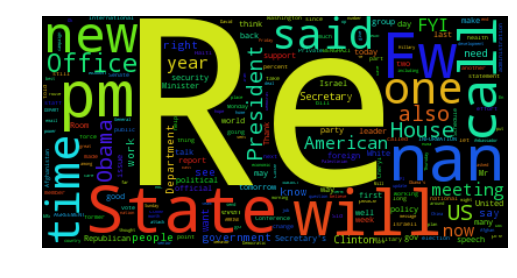

In [6]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text_str)
plt.imshow(wordcloud)
plt.axis("off")

# WordCloud on Clean Data

In [17]:
from cleaner import *

# initiate Cleaner class
filter_list = ['nan']
cleaner = Cleaner(filter_list)
clean_text = cleaner.cleaning_pipeline(text_str)
clean_text[:1000]

'thursday march 2011 latest syria aiding qaddafi sid hrc memo syria aiding libya 030311 docx hrc memo syria aiding libya 030311 docx march 2011 hillary thx friday march 2011 huma abedin latest syria aiding qaddafi sid hrc memo syria aiding libya 030311 docx pis print pis print wednesday september 2012 russorv state gov meet wing extremist anti fvluslim film sparked deadly riots meat wednesday september 2012 subject meet wing extremist anti muslim film sparked deadly riots htte maxbiumenthal com12012 meet wing extremist anti musiim tihn sparked deadly riots verizon wireless lte droid department state case 2015 04841 doc c05739559 date 2015 state dept produced house select benghazi comm subject agreement sensitive information redactions foia waiver state 5cb0045251 friday march 2011 huma abedin latest syria aiding qaddafi sid hrc memo syria aiding libya 030311 docx pis print fyi wednesday september 2012 fwd libya libya sept docx sending direct verizon wireless lte druid fyi wednesday sep

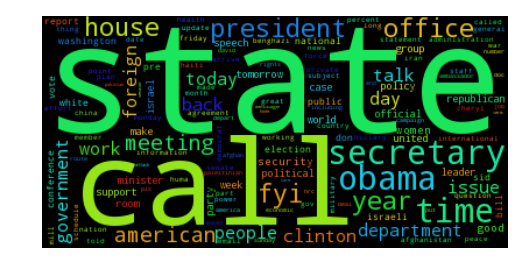

In [18]:
wc = WordCloud(max_words=1000)
wc.generate(clean_text)
plt.imshow(wc, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [25]:
trump_coloring = np.array(Image.open("./other/trump.png"))
wc_colored = WordCloud(max_words=10, mask=trump_coloring, random_state=1)
wc_colored.generate(clean_text)

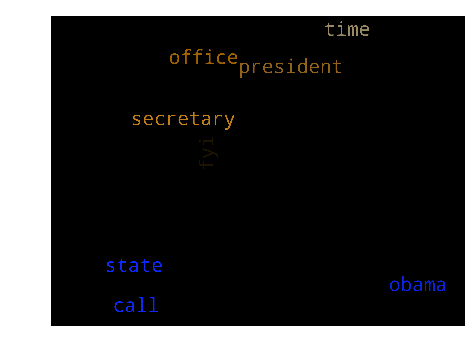

In [28]:
# create coloring from image
image_colors = ImageColorGenerator(trump_coloring)
plt.imshow(wc_colored.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

In [27]:
wc.to_file("trump<3clinton2.png")


We should add a lot of different things in the stop words.. For example, we see that FYI is used a lot. I'm not really motivated to do that, therefore I let you do it. xoxo

# Sentimental Analysis on the countries

In [39]:
countries = {}

bullshit_countries = ["Antarctica"]

for country in pycountry.countries:
    if country.name not in bullshit_countries:
        list_to_search = []
        list_to_search.append(country.name.split(",")[0].lower())
        list_to_search.append(country.alpha_2)
        list_to_search.append(country.alpha_3)
        try:
            str_text = requests.get("https://restcountries.eu/rest/v1/alpha/" + country.alpha_2.lower()).text
            dic = json.loads(str_text)
            list_to_search.append(dic["capital"].lower())
        except:
            print(str_text)
            pass

        if country.name == "Syrian Arab Republic":
            list_to_search.append("syria")
        if country.name == "Russian Federation":
            list_to_search.append("russia")
        countries[country.name] = list_to_search

In [40]:
countries["UK"] = ['uk', 'united kingdom', 'great britain']
countries["United States"].append("U.S.")
countries["United States"].append("U.S.A.")

249

In [47]:
len(countries)

249

In [46]:
countries["United States"]

['united states', 'US', 'USA', 'washington, d.c.']

In [48]:
stopwords = list(STOPWORDS)

cited_countries = {}
for i in range(100):
    body = str(emails.iloc[i].ExtractedBodyText)
    body_lower = body.lower()
    subject = str(emails.iloc[i].ExtractedSubject).lower()
    
    body = body.split(" ")
    body.extend(body_lower.split(" "))
    
    subject = subject.split(" ")
    if body != "nan":  
        for ctr in countries:
            for citation in countries[ctr]:
                if (citation in body or citation in subject):
                    if ctr in cited_countries:
                        cited_countries[ctr]["nbr_citation"] += 1
                        cited_countries[ctr]["citation"].append(citation)
                    else:
                        subdic = {}
                        subdic["sentiment"] = []
                        subdic["average_sentiment"] = 0
                        subdic["nbr_citation"] = 1
                        subdic["citation"] = [citation]
                        cited_countries[ctr] = subdic
                    break
    

In [49]:
cited_countries

{'Andorra': {'average_sentiment': 0,
  'citation': ['AND', 'AND'],
  'nbr_citation': 2,
  'sentiment': []},
 'Armenia': {'average_sentiment': 0,
  'citation': ['AM', 'AM'],
  'nbr_citation': 2,
  'sentiment': []},
 'Chad': {'average_sentiment': 0,
  'citation': ['chad'],
  'nbr_citation': 1,
  'sentiment': []},
 'China': {'average_sentiment': 0,
  'citation': ['china'],
  'nbr_citation': 1,
  'sentiment': []},
 'Egypt': {'average_sentiment': 0,
  'citation': ['cairo',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt',
   'egypt'],
  'nbr_citation': 9,
  'sentiment': []},
 'France': {'average_sentiment': 0,
  'citation': ['france', 'france'],
  'nbr_citation': 2,
  'sentiment': []},
 'India': {'average_sentiment': 0,
  'citation': ['IN'],
  'nbr_citation': 1,
  'sentiment': []},
 'Iran, Islamic Republic of': {'average_sentiment': 0,
  'citation': ['iran', 'iran'],
  'nbr_citation': 2,
  'sentiment': []},
 'Iraq': {'average_sentiment': 0,
  'citation': ['